In [2]:
import numpy as np

from hottbox.core import Tensor
from hottbox.algorithms.decomposition import TTSVD, HOSVD, HOOI, CPD
from hottbox.metrics import residual_rel_error,mse,mape

import pandas as pd
import tensortools as tt

import time

import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# Создание синтетического датасета
I, J, K, R = 200, 100, 100, 3 # размерность и ранг матрицы
tensor = tt.randn_ktensor((I, J, K), rank=R).full()
tensor = tensor + np.random.randn(I, J, K)  # добавление шума

In [4]:
df = pd.read_csv('/Users/muzalevskiy/Downloads/accelerometer.csv')

In [5]:
df

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121
...,...,...,...,...,...
152995,3,100,1.051,0.090,-0.262
152996,3,100,0.918,0.039,-0.129
152997,3,100,1.156,-0.094,-0.227
152998,3,100,0.934,0.203,-0.172


Text(0.5, 1.0, 'Acceleration.x in dependency of time')

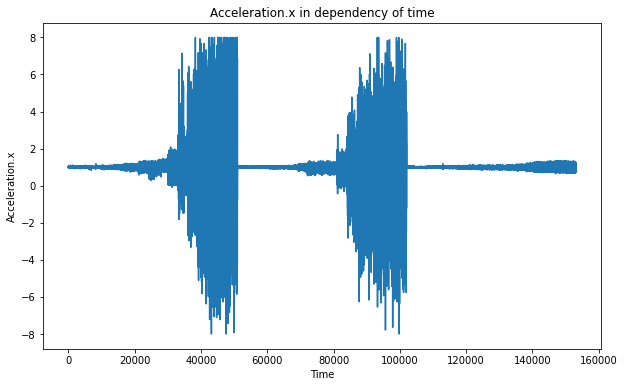

In [12]:
plt.figure(figsize=(10,6))

plt.plot(df['x'])
plt.xlabel("Time")
plt.ylabel("Acceleration.x")
plt.title("Acceleration.x in dependency of time")

Text(0.5, 1.0, 'Acceleration.y in dependency of time')

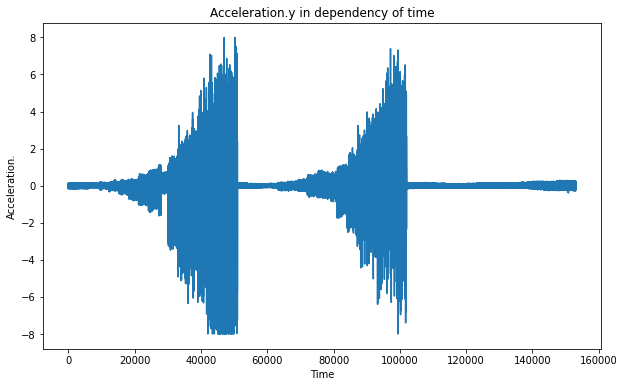

In [13]:
plt.figure(figsize=(10,6))

plt.plot(df['y'])
plt.xlabel("Time")
plt.ylabel("Acceleration.")
plt.title("Acceleration.y in dependency of time")

Text(0.5, 1.0, 'Acceleration.y in dependency of time')

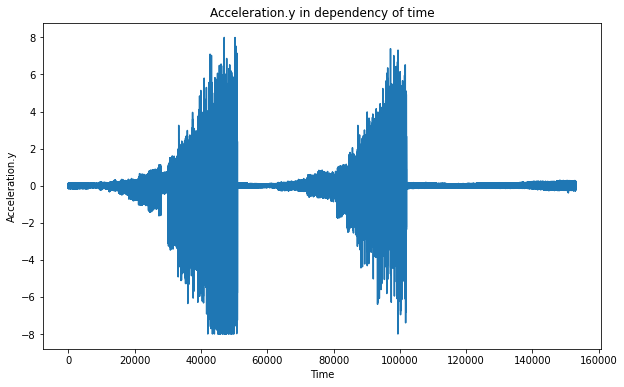

In [14]:
plt.figure(figsize=(10,6))

plt.plot(df['y'])
plt.xlabel("Time")
plt.ylabel("Acceleration.y")
plt.title("Acceleration.y in dependency of time")

In [16]:
lst = ['x','y','z']
df = df[lst]

In [17]:
df = np.array(df)

In [51]:
tensor = Tensor(tensor)

In [52]:
alg = CPD()
alg

CPD(epsilon=0.01, init='svd', max_iter=50, random_state=None, tol=0.0001,
    verbose=False)

In [53]:
kruskal_rank = (10,)

st = time.time()
tensor_cpd = alg.decompose(tensor, rank=kruskal_rank)
et = time.time()


print("\tOutput of the {} algorithm:".format(alg.name))
print(tensor_cpd)

print('\n\tFactor matrices')
for mode, fmat in enumerate(tensor_cpd.fmat):
    print('Mode-{} factor matrix is of shape {}'.format(mode, fmat.shape))
    
print('\n\tCore tensor')
print(tensor_cpd.core)

elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

	Output of the CPD algorithm:
Kruskal representation of a tensor with rank=(10,).
Factor matrices represent properties: ['mode-0', 'mode-1', 'mode-2']
With corresponding latent components described by (200, 100, 100) features respectively.

	Factor matrices
Mode-0 factor matrix is of shape (200, 10)
Mode-1 factor matrix is of shape (100, 10)
Mode-2 factor matrix is of shape (100, 10)

	Core tensor
This tensor is of order 3 and consists of 1000 elements.
Sizes and names of its modes are (10, 10, 10) and ['mode-0', 'mode-1', 'mode-2'] respectively.
Execution time: 0.2998802661895752 seconds


In [54]:
alg = HOSVD()
alg

HOSVD(process=(), verbose=False)

In [55]:
ml_rank = (10,10,10)

st_ = time.time()
tensor_tkd_hosvd = alg.decompose(tensor, ml_rank)
et_ = time.time()

print("\tOutput of the {} algorithm:".format(alg.name))
print(tensor_tkd_hosvd)

print('\n\tFactor matrices')
for mode, fmat in enumerate(tensor_tkd_hosvd.fmat):
    print('Mode-{} factor matrix is of shape {}'.format(mode, fmat.shape))
    
print('\n\tCore tensor')
print(tensor_tkd_hosvd.core)

elapsed_time_ = et_ - st_
print('Execution time:', elapsed_time_, 'seconds')

	Output of the HOSVD algorithm:
Tucker representation of a tensor with multi-linear rank=(10, 10, 10).
Factor matrices represent properties: ['mode-0', 'mode-1', 'mode-2']
With corresponding latent components described by (200, 100, 100) features respectively.

	Factor matrices
Mode-0 factor matrix is of shape (200, 10)
Mode-1 factor matrix is of shape (100, 10)
Mode-2 factor matrix is of shape (100, 10)

	Core tensor
This tensor is of order 3 and consists of 1000 elements.
Sizes and names of its modes are (10, 10, 10) and ['mode-0', 'mode-1', 'mode-2'] respectively.
Execution time: 0.0699770450592041 seconds


In [56]:
rel_error = residual_rel_error(tensor, tensor_cpd)
print(rel_error)

0.48574392171134073


In [57]:
rel_error = mse(tensor, tensor_cpd)
print(rel_error)

0.9959868093772314


In [58]:
rel_error = mape(tensor, tensor_cpd)
print(rel_error)

4.433565655635869


In [47]:
rel_error = residual_rel_error(tensor, tensor_tkd_hosvd)
print(rel_error)

0.5004897292254901


In [48]:
rel_error = mse(tensor, tensor_tkd_hosvd)
print(rel_error)

0.999478354901803


In [49]:
rel_error = mape(tensor, tensor_tkd_hosvd)
print(rel_error)

4.79531704148481
